# Toy Schedules Generation

Generate a population (schedules and attributes). Where every schedule is home -> work -> home, with varying durations. Attributes are randomly assigned.

In [3]:
from pathlib import Path

import pandas as pd
import random

from caveat.data.synth import ActivityGen
from caveat.data.utils import generate_population, trace_to_pam
from caveat.evaluate.describe.times import (
    joint_time_distributions_plot,
    times_distributions_plot,
)
from caveat.evaluate.describe.transitions import sequence_prob_plot

In [13]:
n = 10000

schedules_write_path = Path("tmp/toy_schedules.csv")
attributes_write_path = Path("tmp/toy_attributes.csv")


In [14]:
pids = []
acts = []
starts = []
ends = []
durations = []
for i in range(n):
    departure_time = random.randint(300, 600)
    work_duration = random.randint(120, 600)
    home_duration = 1440 - work_duration - departure_time
    t = 0
    for act, duration in zip(
        ["home", "work", "home"], [departure_time, work_duration, home_duration]
    ):
        pids.append(i)
        acts.append(act)
        starts.append(t)
        t += duration
        ends.append(t)
        durations.append(duration)

schedules = pd.DataFrame(
    {
        "pid": pids,
        "act": acts,
        "start": starts,
        "end": ends,
        "duration": durations,
    }
)
schedules.head()


,pid,act,start,end,duration
0,0,home,0,571,571
1,0,work,571,842,271
2,0,home,842,1440,598
3,1,home,0,492,492
4,1,work,492,1028,536


In [22]:
pids = []
genders = []
ages = []
work_statuses = []
educations = []
licenses = []
car_accesses = []

for i in range(n):
    pids.append(i)
    genders.append(random.choice(["m", "f"]))
    ages.append(random.randint(18, 85))
    work_statuses.append(random.choice(["employed", "unemployed"]))
    educations.append(random.choice(["low", "medium", "high"]))
    licenses.append(random.choice(["yes", "no"]))
    car_accesses.append(random.choice(["yes", "no"]))

attributes = pd.DataFrame(
    {
        "pid": pids,
        "gender": genders,
        "age": ages,
        "work_status": work_statuses,
        "education": educations,
        "license": licenses,
        "car_access": car_accesses,
    }
)
attributes.head()


,pid,gender,age,work_status,education,license,car_access
0,0,m,54,employed,high,no,no
1,1,f,32,employed,medium,no,no
2,2,f,42,unemployed,low,yes,no
3,3,f,20,unemployed,high,no,no
4,4,f,58,employed,medium,yes,yes


In [23]:
schedules_write_path.parent.mkdir(exist_ok=True)
attributes_write_path.parent.mkdir(exist_ok=True)
schedules.to_csv(schedules_write_path, index=False)
attributes.to_csv(attributes_write_path, index=False)


In [24]:
def describe_col(population, col: str) -> pd.DataFrame:
    description = population.groupby("act")[col].describe()[
        ["count", "mean", "std", "min", "max"]
    ]
    description["attribute"] = col
    return description


def describe_cols(population, cols: list[str]) -> pd.DataFrame:
    description = pd.concat(
        [describe_col(population, c) for c in cols], ignore_index=False
    )
    description = description.reset_index().set_index(["attribute", "act"])
    return description


describe_cols(schedules, ["start", "end", "duration"]).round()

count   mean    std    min     max
attribute act                                       
start     home  20000.0  405.0  422.0    0.0  1192.0
          work  10000.0  450.0   87.0  300.0   600.0
end       home  20000.0  945.0  499.0  300.0  1440.0
          work  10000.0  811.0  164.0  421.0  1192.0
duration  home  20000.0  539.0  159.0  248.0  1019.0
          work  10000.0  361.0  139.0  120.0   600.0

In [25]:
def time_distributions(population: pd.DataFrame, mapping: dict):
    starts = {k: [] for k in mapping.values()}
    ends = {k: [] for k in mapping.values()}
    durations = {k: [] for k in mapping.values()}
    for act, acts in population.groupby("act"):
        starts[act] = list(acts.start)
        ends[act] = list(acts.end)
        durations[act] = list(acts.duration)
    return starts, ends, durations

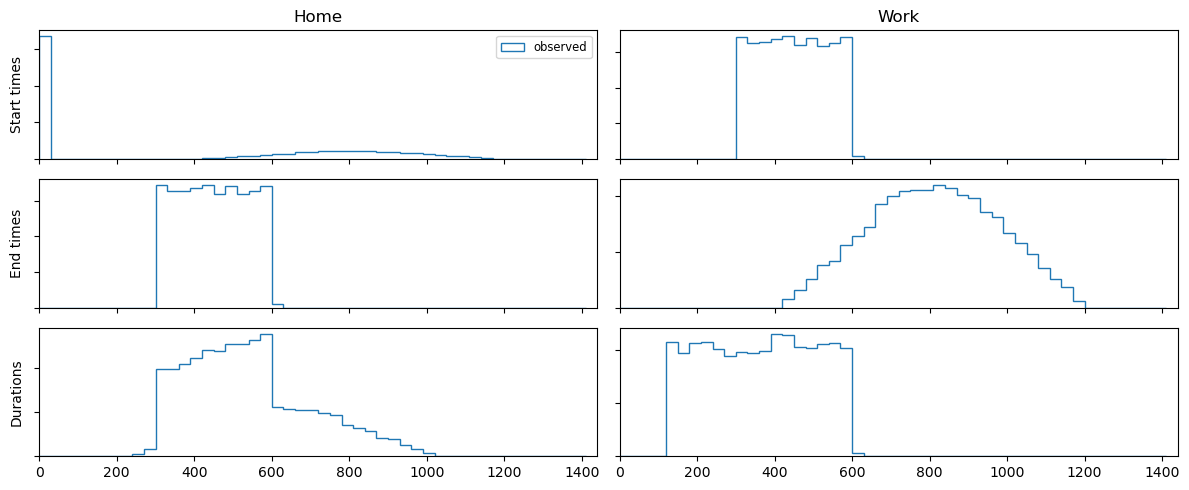

In [26]:
_ = times_distributions_plot(schedules, ys={})

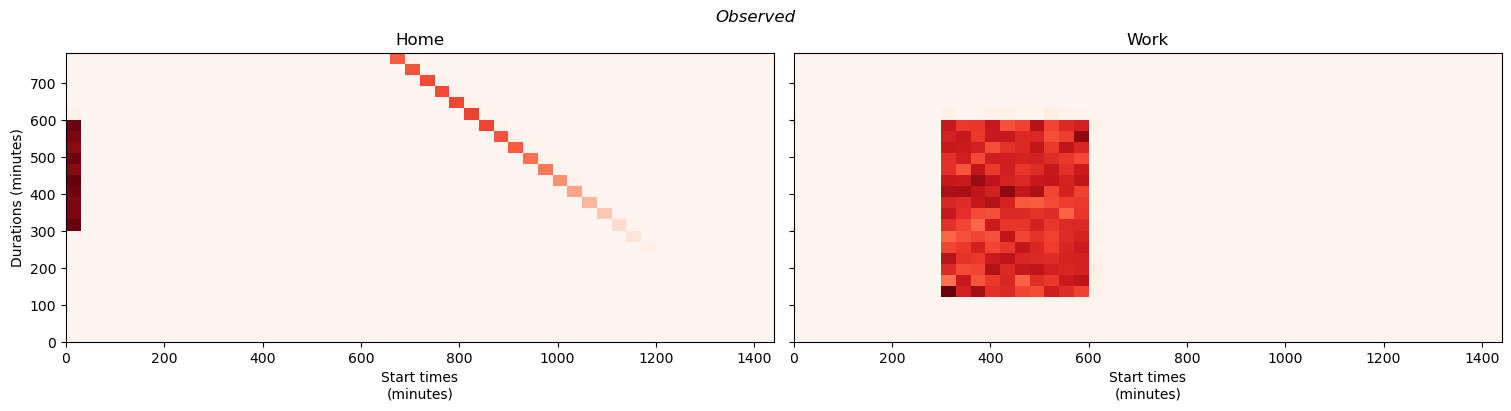

In [27]:
_ = joint_time_distributions_plot(schedules, ys={})

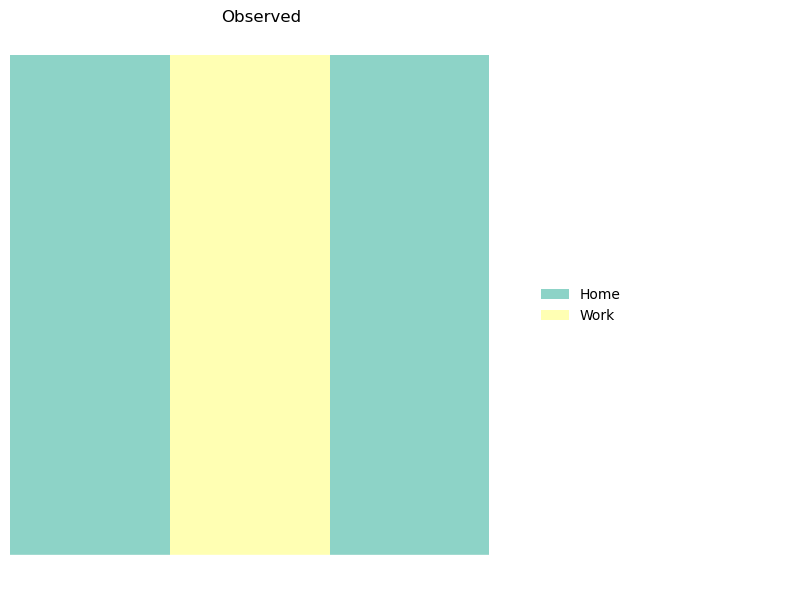

In [28]:
_ = sequence_prob_plot(schedules, ys={}, figsize=(8, 6))